# Semana 3 - Desenvolvendo modelos de machine learning para prever churn

Depois de tratar nosso dataset e explorá-lo, criando visualizações para nos auxiliar na formulação de hipóteses sobre a ocorrência de churn, agora o objetivo é criar diferentes modelos de machine learning que serão responsáveis por prever novos casos de churn a partir da nossa base de dados.

## Importando dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(20)

dados = pd.read_csv('./data_churn_rate_processed.csv')
pd.set_option('display.max_columns', 100)

dados

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_mensal,cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque por correio,2.19,65.60,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque por correio,2.00,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.46,73.90,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque por correio,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,Sim,Não,Não,Sim,Não,Não,Anual,Não,Cheque por correio,1.84,55.15,742.90
7263,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,2.84,85.10,1873.70
7264,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque por correio,1.68,50.30,92.75
7265,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,Bienal,Não,Cheque por correio,2.26,67.85,4627.65


## Tratamento final dos dados

Primeiro vamos filtrar nosso dataset com o objetivo de descartar os valores de churn 'Indefinidos', pois para treinar nossos modelos vamos utilizar apenas instâncias devidamente classificadas.

Além disso, duas colunas também serão descartadas, pois são redundantes ("cobranca_mensal" traz a mesma informação que "cobranca_diaria") ou representam identificadores únicos dos clientes ("id_cliente")

In [2]:
dados = dados.loc[dados.churn != 'Indefinido'].reset_index(drop=True)

dados.drop(['id_cliente','cobranca_mensal'], axis=1, inplace=True)

Modelos de machine learning trabalham sempre com valores numéricos, até mesmo no caso de variáveis categóricas. 

Por isso, precisamos adequar nosso dataset a essa relidade, convertendo variáveis categóricas em valores numéricos binários para representar a idade de Sim e Não (0 = não, 1 = sim).

### Transformação de categorico string para binário

In [3]:
# Colunas categóricas de comportamento binário. Vamos converter os Nãos para 0 e os Sims para 1. Além disso, gênero "Feminino" receberá valor 0 e "Masculino" valor 1.round

dados.replace({'Não':0, 'Sim':1, 'Feminino':0,'Masculino':1}, inplace=True)

Outra variável que segue esse padrão é a `multiplas_linhas`. Apesar de ser composta por três valores únicos ('Sim', 'Não' e 'Sem serviço telefônico'), o valor de 'Sem serviço telefônico' não traz nenhuma informação nova ao dataset, pois também significa que o cliente não tem múltiplas linhas telefônicas.

Portanto, podemos também aplicar a lógica binária nesta coluna

In [4]:
# Convertendo valores de 'Sem serviço telefônico' para 'Não'
dados.loc[dados.multiplas_linhas == 'Sem serviço telefônico','multiplas_linhas'] = 'Não'

# Convertendo coluna 'multiplas_linhas' para lógica binária
dados.multiplas_linhas.replace({'Não':0,'Sim':1}, inplace=True)
dados.multiplas_linhas.unique()

array([0, 1])

A mesma coisa acontece nas variáveis de serviços adicionais relacionadas a internet, as quais possuem o valor "Sem serviço de internet"

In [5]:
dados.replace({'Sem serviço de internet':0}, inplace=True)

In [6]:
dados

,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_total
0,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque por correio,2.19,593.30
1,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensal,0,Cheque por correio,2.00,542.40
2,1,1,0,0,0,4,1,0,Fibra ótica,0,0,1,0,0,0,Mensal,1,Cheque eletrônico,2.46,280.85
3,1,1,1,1,0,13,1,0,Fibra ótica,0,1,1,0,1,1,Mensal,1,Cheque eletrônico,3.27,1237.85
4,1,0,1,1,0,3,1,0,Fibra ótica,0,0,0,1,1,0,Mensal,1,Cheque por correio,2.80,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,Anual,0,Cheque por correio,1.84,742.90
7039,1,1,0,1,0,22,1,1,Fibra ótica,0,0,0,0,0,1,Mensal,1,Cheque eletrônico,2.84,1873.70
7040,0,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Mensal,1,Cheque por correio,1.68,92.75
7041,0,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Bienal,0,Cheque por correio,2.26,4627.65


### Encoding

Para finalizar, restaram apenas três colunas categóricas com múltiplas categorias (servico_internet, contrato e forma_pagamento).

Nestes casos, vamos aplicar a técnica de encoding chamada de One-Hot Encoding. 

Nesta técnica **n** novas colunas são criadas no dataset, em que **n** é igual ao número de categorias da coluna sendo convertida. Então, cada uma dessas novas colunas representa a lógica binária de Sim e Não utilizada nas outras colunas do dataset.

In [7]:
colunas_encoding = ['servico_internet','contrato','forma_pagamento']

dados = pd.get_dummies(data=dados, columns=colunas_encoding)

dados

,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,fatura_online,cobranca_diaria,cobranca_total,servico_internet_0,servico_internet_DSL,servico_internet_Fibra ótica,contrato_Anual,contrato_Bienal,contrato_Mensal,forma_pagamento_Cartão de crédito (automático),forma_pagamento_Cheque eletrônico,forma_pagamento_Cheque por correio,forma_pagamento_Transferência bancária (automático)
0,0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,2.19,593.30,0,1,0,1,0,0,0,0,1,0
1,0,1,0,0,0,9,1,1,0,0,0,0,0,1,0,2.00,542.40,0,1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,4,1,0,0,0,1,0,0,0,1,2.46,280.85,0,0,1,0,0,1,0,1,0,0
3,1,1,1,1,0,13,1,0,0,1,1,0,1,1,1,3.27,1237.85,0,0,1,0,0,1,0,1,0,0
4,1,0,1,1,0,3,1,0,0,0,0,1,1,0,1,2.80,267.40,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,1,0,0,1,0,0,0,1.84,742.90,0,1,0,1,0,0,0,0,1,0
7039,1,1,0,1,0,22,1,1,0,0,0,0,0,1,1,2.84,1873.70,0,0,1,0,0,1,0,1,0,0
7040,0,1,0,0,0,2,1,0,0,1,0,0,0,0,1,1.68,92.75,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,67,1,0,1,0,1,1,0,1,0,2.26,4627.65,0,1,0,0,1,0,0,0,1,0


## Balanceamento dos dados

Antes de criar efetivamente nosso modelos, é importante saber se nossa variável target (churn) está balanceada. Uma grande discrepância na distribuição da variável target pode "viciar" nosso modelo de classificação, já que ele não terá uma diversidade de casos para aprender com nossos dados.

In [8]:
dados.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

Há um grande desequilíbrio nos casos da variável target, o que faz sentido já que casos de churn tendem a ser mais incomuns. Para corrigir isso, vamos aplicar a técnica de **oversampling**, utilizando a técnica SMOTE.

In [9]:
# Primeiro vamos separar nosso dataset em X e Y
x = dados.drop(['churn'], axis=1).reset_index(drop=True)
y = dados[['churn']].reset_index(drop=True)

In [10]:
# Oversampling com SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_resampled, y_resampled = sm.fit_resample(x, y)

print(y_resampled.value_counts())

/home/freelancer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/freelancer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/freelancer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


churn
0        5174
1        5174
dtype: int64


# Modelos de Machine Learning

Para qualquer modelo de ML, vamos precisar realizar algumas operações básicas como a separação de datasets de treino e teste ou treino do modelo. 

Com objetivo de facilitar o trabalho, algumas funções serão definidas.

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def executar_classificador(classificador, x_train, x_test, y_train):
    classificador.fit(x_train, y_train.values.ravel())
    y_pred = classificador.predict(x_test)
    return y_pred

def validar_classificador(y_pred, y_test):
    print('Acurácia:', accuracy_score(y_test, y_pred))
    print('Precisão:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, stratify=y_resampled)

/home/freelancer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## LinearSVC

Acurácia: 0.7873985311171241
Precisão: 0.7423352902804957
Recall: 0.880123743232792
F1 score: 0.8053786270346779


/home/freelancer/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


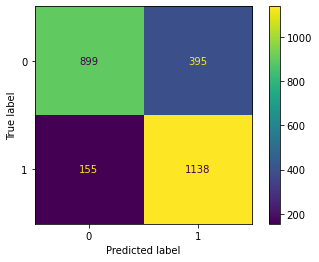

In [14]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(max_iter=500)

y_pred = executar_classificador(linearSVC, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

### Novo modelo SVC com novos parâmetros

Acurácia: 0.8341708542713567
Precisão: 0.8297709923664122
Recall: 0.8406805877803558
F1 score: 0.8351901651940069


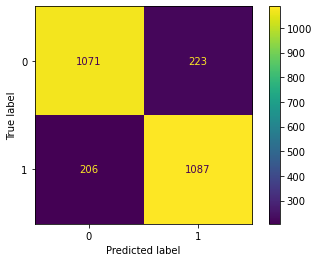

In [58]:
linearSVC = LinearSVC(max_iter=1000, dual=False)

y_pred = executar_classificador(linearSVC, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

## Decision Tree

Acurácia: 0.7939698492462312
Precisão: 0.7887537993920972
Recall: 0.802784222737819
F1 score: 0.7957071674971253


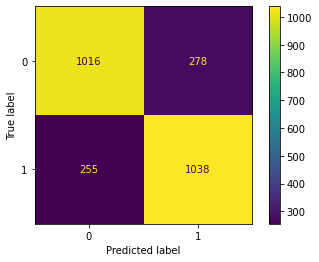

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=20)

y_pred = executar_classificador(dt, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

### Nova DT com novos parâmetros

Acurácia: 0.8245071511403169
Precisão: 0.817562452687358
Recall: 0.8352668213457076
F1 score: 0.8263198163733741


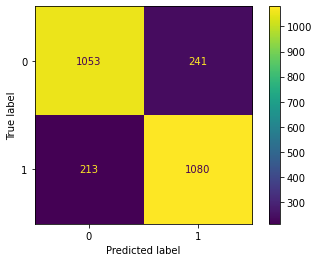

In [67]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=20)

y_pred = executar_classificador(dt, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

## Random Forest

Acurácia: 0.8411287205257054
Precisão: 0.8381901840490797
Recall: 0.8453209590100541
F1 score: 0.8417404697728148


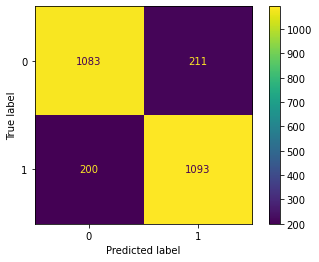

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

y_pred = executar_classificador(rf, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

### Nova RF com novos parâmetros

Acurácia: 0.8384228836490143
Precisão: 0.8136200716845878
Recall: 0.8778035576179428
F1 score: 0.8444940476190477


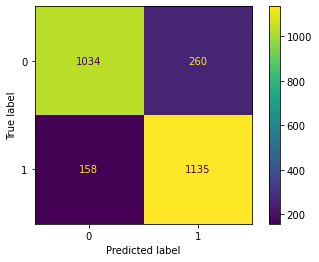

In [86]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=20, min_samples_split=5)

y_pred = executar_classificador(rf, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

## Comparando os três modelos

In [92]:
modelos = [linearSVC, dt, rf]
name_modelos = ['LinearSVC','DecisionTree','RandomForest']
list_to_df = []

for modelo in modelos:
    y_pred = executar_classificador(modelo, x_train, x_test, y_train)
    aux_list = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),f1_score(y_test, y_pred)]
    list_to_df.append(aux_list)

In [93]:
print(list_to_df)
df = pd.DataFrame(list_to_df, columns=['acurracy','precision','recall','f1_score'])
df['model'] = name_modelos
df

[[0.8341708542713567, 0.8297709923664122, 0.8406805877803558, 0.8351901651940069], [0.8245071511403169, 0.817562452687358, 0.8352668213457076, 0.8263198163733741], [0.8384228836490143, 0.8136200716845878, 0.8778035576179428, 0.8444940476190477]]


,acurracy,precision,recall,f1_score,model
0,0.834171,0.829771,0.840681,0.835190,LinearSVC
1,0.824507,0.817562,0.835267,0.826320,DecisionTree
2,0.838423,0.813620,0.877804,0.844494,RandomForest


Analisando os resultados, fica evidente que o modelo Random Forest foi o que teve melhor desempenho considerando a maioria das métricas.

Principalmente pesa o fato do modelo RF ter o maior valor de **recall**, que mede a capacidade do modelo em não gerar Falsos Negativos, algo importante para o problema da taxa de churn.

## Otimizando o modelo Random Forest

Como última tentativa de melhora do modelo, vamos aplicar a técnica de RandomizedSearchCV, que testa automaticamente vários parâmetros de construção da RF e define a melhor combinação de parâmetros.

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
n_estimators = np.arange(10,300, step=20)
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
max_depth = np.arange(3,20, step=1)
min_samples_split = np.arange(2,15, step=2)
min_samples_leaf = [1, 2, 4, 8, 10, 12]
bootstrap = [False, True]

values_dict = [n_estimators, criterion, max_features, max_depth, min_samples_split, min_samples_leaf]
names_dict = ['n_estimators','criterion','max_features','max_depth','min_samples_split','min_samples_leaf','bootstrap']
dict_parameters = dict(zip(names_dict, values_dict))

dict_parameters

{'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
        270, 290]),
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
 'min_samples_leaf': [1, 2, 4, 8, 10, 12]}

In [99]:
randomCV = RandomizedSearchCV(rf, dict_parameters, n_iter=5, cv=3, scoring='recall', n_jobs=1)
randomCV.fit(x_train, y_train)

/home/freelancer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/freelancer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/freelancer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/freelancer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_split=5,
                                                    n_estimators=300,
                                                    random_state=20),
                   n_iter=5, n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10,
                                                             12],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  30, 

In [100]:
rcv_results = pd.DataFrame(randomCV.cv_results_)
rcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.073689,0.006013,0.070690,0.003854,230,2,10,sqrt,15,entropy,"{'n_estimators': 230, 'min_samples_split': 2, ...",0.857695,0.880216,0.870170,0.869361,0.009212,4
1,0.861271,0.013149,0.063037,0.006263,250,2,8,auto,6,entropy,"{'n_estimators': 250, 'min_samples_split': 2, ...",0.868523,0.893354,0.892581,0.884819,0.011528,2
2,0.241818,0.006806,0.022716,0.000593,70,12,12,log2,7,entropy,"{'n_estimators': 70, 'min_samples_split': 12, ...",0.873163,0.888717,0.887944,0.883275,0.007157,3
3,1.544736,0.114106,0.087039,0.002749,250,4,2,auto,17,entropy,"{'n_estimators': 250, 'min_samples_split': 4, ...",0.854602,0.873261,0.863215,0.863693,0.007625,5
4,0.907187,0.063853,0.061198,0.005721,250,2,1,auto,6,entropy,"{'n_estimators': 250, 'min_samples_split': 2, ...",0.875483,0.898764,0.896445,0.890231,0.010471,1


### Melhores parâmetros para RF

In [101]:
best_parameters = randomCV.best_params_
best_parameters

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'entropy'}

Acurácia: 0.8218013142636258
Precisão: 0.786896551724138
Recall: 0.8824439288476411
F1 score: 0.8319358366751732


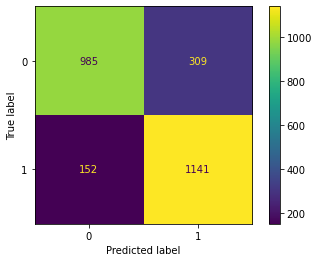

In [102]:
rf = RandomForestClassifier(**best_parameters, random_state=20)

y_pred = executar_classificador(rf, x_train, x_test, y_train)
validar_classificador(y_pred, y_test)

## Análise de importância das features

Text(0.5, 1.0, 'Importância de cada feature')

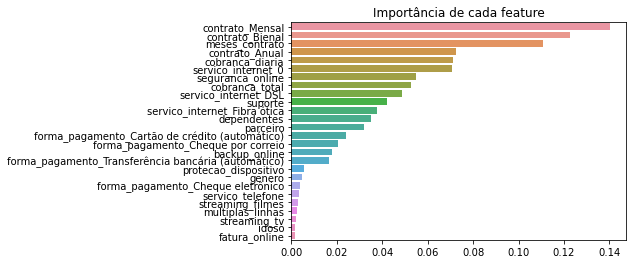

In [114]:
importances = pd.Series(data=rf.feature_importances_, index=x.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Com essa análise, é possível perceber que as variáveis mais importantes estão relacionadas ao tempo e tipo de contrato de contrato, ao preço dos serviços e também variáveis relacionadas ao serviço de internet.

# Conclusão

Os resultados apresentados mostram que, na comparação com modelos de Decision Tree e de Linear SVC, o método de classificação Random Forest é o mais indicado para classificar casos de churn na empresa **Alura Voz**.

Foram obtidos valores bastante satisfatórios nas métricas de perfomance do modelo como acurácia, recall, precisão e F1 Score, com todos os valores superando 0.80.

A versão final do modelo foi construída com parâmetros obtidos automaticamente através da técnica de RandomizedSeachCV. De acordo com os resultados obtidos, o melhor modelo Random Forest para predizer o churn de clientes da Alura Voz tem os seguintes parâmetros:

* 'n_estimators': 250,
* 'min_samples_split': 2,
* 'min_samples_leaf': 1,
* 'max_features': 'auto',
* 'max_depth': 6,
* 'criterion': 'entropy'

Por fim, o modelo indicou que na problemática abordada durante o desafio os atributos mais importantes estão relacionados ao tempo e tipo de contrato de contrato, ao preço dos serviços e também variáveis relacionadas ao serviço de internet.